In [2]:
import pandas as pd

# Load the traffic count data
traffic_count_df = pd.read_csv('../count/THINGS WE DID/merged_traffic_count_with_coordinates.csv')

# Load the accident data
accident_df = pd.read_csv('../accidents/puf Äùàûÿ.csv', encoding='ISO-8859-8')

# Display the first few rows of each dataset
print("Traffic Count Data:")
print(traffic_count_df.head())

print("\nAccident Data:")
print(accident_df.head())


Traffic Count Data:
   shnat_seker  kvish  keta  maslul  hodesh  yom  yom_bashavua  shaa  \
0         2021      1    20       1       7    6             3     0   
1         2021      1    20       1       7    6             3     1   
2         2021      1    20       1       7    6             3     2   
3         2021      1    20       1       7    6             3     3   
4         2021      1    20       1       7    6             3     4   

   kamut_kle_rehev         X         Y  
0             1486  183772.0  657940.0  
1             1170  183772.0  657940.0  
2              795  183772.0  657940.0  
3              601  183772.0  657940.0  
4             1134  183772.0  657940.0  

Accident Data:
   pk_teuna_fikt  sug_tik  THUM_GEOGRAFI  SUG_DEREH  SEMEL_YISHUV  REHOV1  \
0     2020031644        1              1          1          1061   159.0   
1     2020079871        1              1          4             0     NaN   
2     2020081980        1              1          1   

In [13]:
import pandas as pd

# Rename columns for consistency
accident_df.rename(columns={'HODESH_TEUNA': 'hodesh', 'SHAA': 'shaa'}, inplace=True)

# Aggregate traffic data by road segment, month, and day
aggregated_traffic_df = traffic_count_df.groupby(['kvish', 'keta', 'hodesh', 'yom']).agg({'kamut_kle_rehev': 'mean'}).reset_index()

# Merge the aggregated traffic data with the accident data using KVISH1
merged_df_kvish1 = pd.merge(accident_df, aggregated_traffic_df, left_on=['KVISH1', 'hodesh', 'YOM_BASHAVUA'], right_on=['kvish', 'hodesh', 'yom'], how='inner')

# Merge the aggregated traffic data with the accident data using KVISH2
merged_df_kvish2 = pd.merge(accident_df, aggregated_traffic_df, left_on=['KVISH2', 'hodesh', 'YOM_BASHAVUA'], right_on=['kvish', 'hodesh', 'yom'], how='inner')

# Combine both results
merged_df = pd.concat([merged_df_kvish1, merged_df_kvish2]).drop_duplicates().reset_index(drop=True)

# Display the merged DataFrame
print(merged_df.all)


<bound method DataFrame.all of      pk_teuna_fikt  sug_tik  THUM_GEOGRAFI  SUG_DEREH  SEMEL_YISHUV  REHOV1  \
0       2021000384        1              1          4             0     NaN   
1       2021000384        1              1          4             0     NaN   
2       2021000928        1              1          4             0     NaN   
3       2021001234        1              1          4             0     NaN   
4       2021001234        1              1          4             0     NaN   
..             ...      ...            ...        ...           ...     ...   
888     2021094349        1              1          3             0     NaN   
889     2021094349        1              1          3             0     NaN   
890     2021094349        1              1          3             0     NaN   
891     2021096395        1              1          3             0     NaN   
892     2021099064        1              1          3             0     NaN   

     REHOV2  BAYIT  

In [9]:
correlation = merged_df['kamut_kle_rehev'].corr(merged_df['HUMRAT_TEUNA'])
print(f"Correlation between traffic volume and accident severity: {correlation}")


Correlation between traffic volume and accident severity: 0.14700817558122994


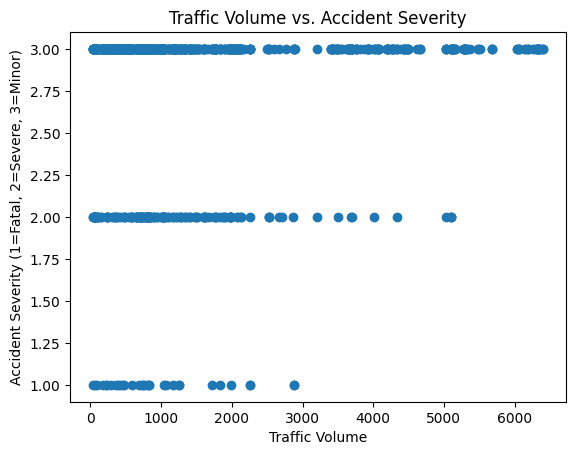

In [10]:
import matplotlib.pyplot as plt

# Scatter plot of traffic volume vs. accident severity
plt.scatter(merged_df['kamut_kle_rehev'], merged_df['HUMRAT_TEUNA'])
plt.xlabel('Traffic Volume')
plt.ylabel('Accident Severity (1=Fatal, 2=Severe, 3=Minor)')
plt.title('Traffic Volume vs. Accident Severity')
plt.show()


In [14]:
# Check if the merged data has the necessary geographic coordinates
print(merged_df[['X', 'Y']].head())


          X         Y
0  199463.0  621415.0
1  199463.0  621415.0
2  183528.0  658855.0
3  179491.0  531672.0
4  179491.0  531672.0


In [16]:
# Export the merged DataFrame to a CSV file
merged_df.to_csv('./merged_traffic_accidents_for_qgis.csv', index=False)


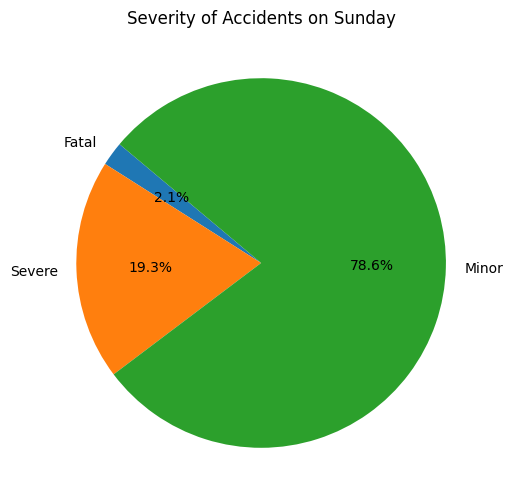

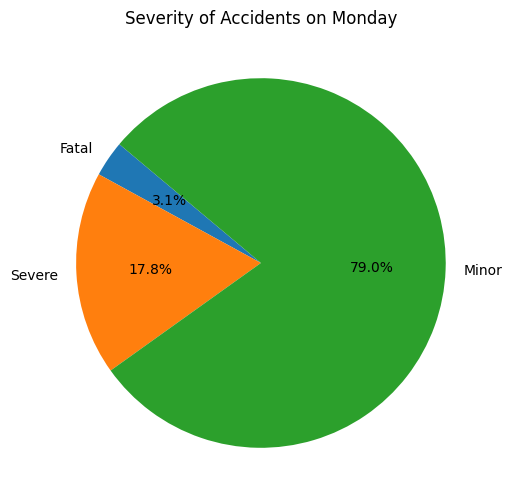

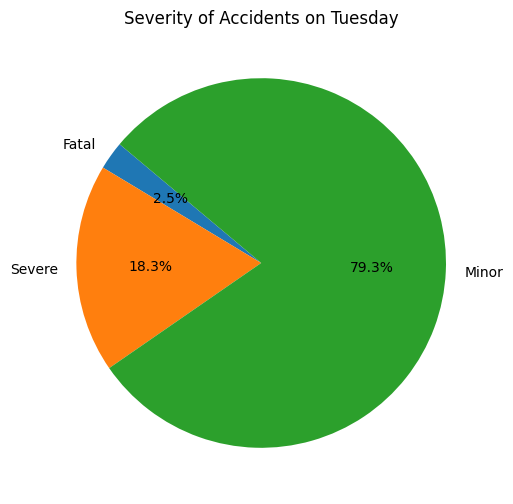

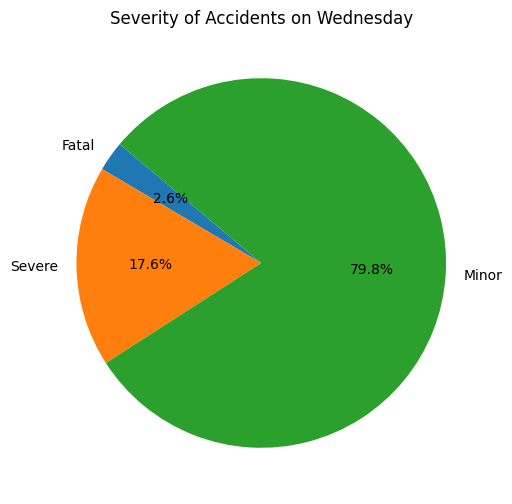

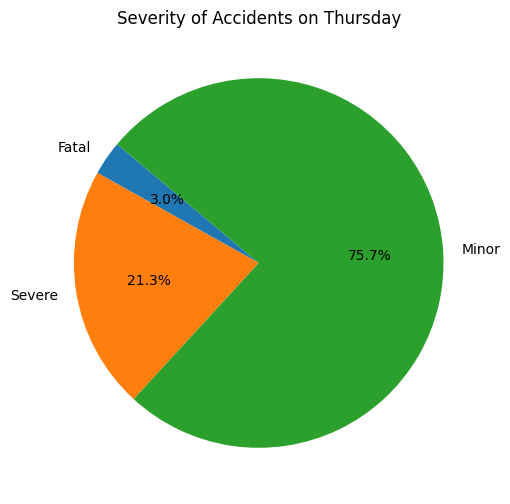

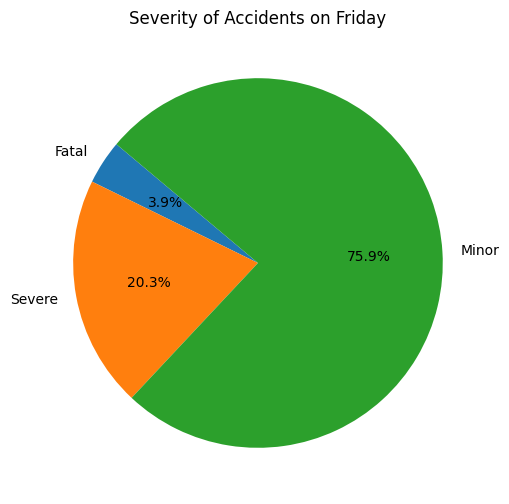

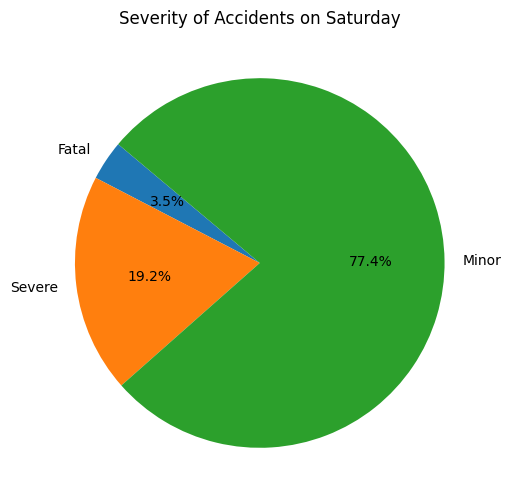

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the accident data
accident_df = pd.read_csv('../accidents/puf Äùàûÿ.csv', encoding='ISO-8859-8')

# Rename columns for consistency
accident_df.rename(columns={'HODESH_TEUNA': 'hodesh', 'SHAA': 'shaa', 'YOM_BASHAVUA': 'yom'}, inplace=True)

# Group data by day of the week and severity
severity_by_day = accident_df.groupby(['yom', 'HUMRAT_TEUNA']).size().unstack(fill_value=0)

# Define labels for the severity levels
severity_labels = {1: 'Fatal', 2: 'Severe', 3: 'Minor'}

# Create a pie chart for each day of the week
days_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in range(1, 8):  # Days are coded as 1=Sunday, 7=Saturday
    plt.figure(figsize=(6, 6))
    plt.pie(severity_by_day.loc[day], labels=[severity_labels.get(i, f"Severity {i}") for i in severity_by_day.columns], autopct='%1.1f%%', startangle=140)
    plt.title(f'Severity of Accidents on {days_labels[day-1]}')
    plt.show()


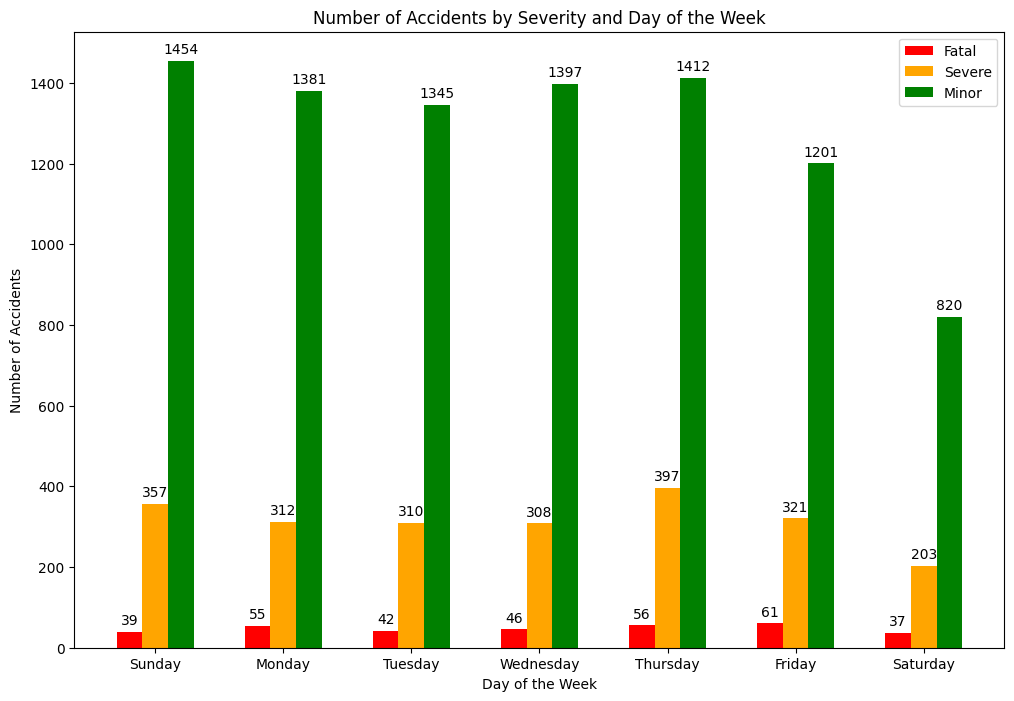

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the accident data
accident_df = pd.read_csv('../accidents/puf Äùàûÿ.csv', encoding='ISO-8859-8')

# Rename columns for consistency
accident_df.rename(columns={'HODESH_TEUNA': 'hodesh', 'SHAA': 'shaa', 'YOM_BASHAVUA': 'yom'}, inplace=True)

# Group data by day of the week and severity
severity_by_day = accident_df.groupby(['yom', 'HUMRAT_TEUNA']).size().unstack(fill_value=0)

# Define labels for the severity levels
severity_labels = {1: 'Fatal', 2: 'Severe', 3: 'Minor'}
severity_colors = {1: 'red', 2: 'orange', 3: 'green'}

# Create a bar plot for each severity level
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
x = np.arange(len(severity_by_day.index))

for i, severity in enumerate(severity_by_day.columns):
    bars = ax.bar(x + i * bar_width, severity_by_day[severity], bar_width, label=severity_labels[severity], color=severity_colors[severity])
    ax.bar_label(bars, padding=3)

# Add labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Accidents')
ax.set_title('Number of Accidents by Severity and Day of the Week')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax.legend()

plt.show()


Traffic Count Data:
   shnat_seker  kvish  keta  maslul  hodesh  yom  yom_bashavua  shaa  \
0         2021      1    20       1       7    6             3     0   
1         2021      1    20       1       7    6             3     1   
2         2021      1    20       1       7    6             3     2   
3         2021      1    20       1       7    6             3     3   
4         2021      1    20       1       7    6             3     4   

   kamut_kle_rehev         X         Y  
0             1486  183772.0  657940.0  
1             1170  183772.0  657940.0  
2              795  183772.0  657940.0  
3              601  183772.0  657940.0  
4             1134  183772.0  657940.0  
   yom  kamut_kle_rehev        Day
0    1       830.946750     Sunday
1    2       808.625281     Monday
2    3       662.171956    Tuesday
3    4       798.523958  Wednesday
4    5       665.321445   Thursday
5    6       651.887391     Friday
6    7       607.667944   Saturday


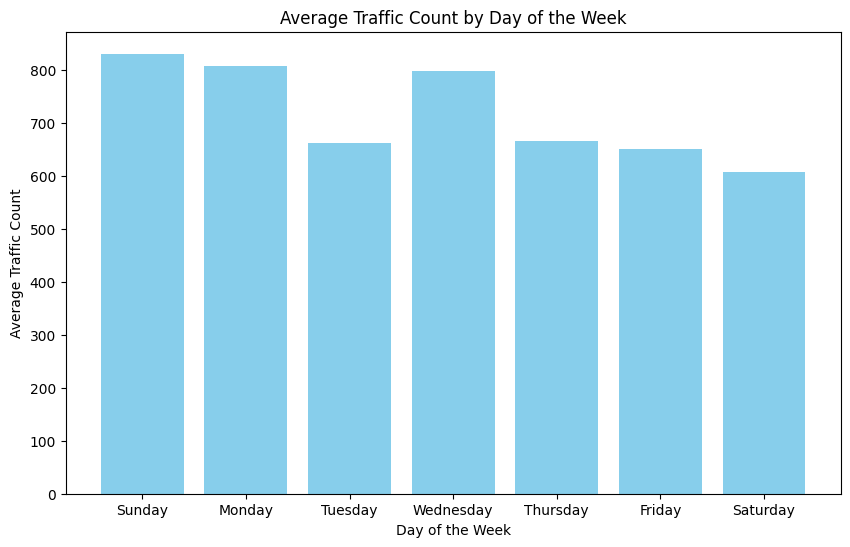

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the traffic count data
traffic_count_df = pd.read_csv('../count/THINGS WE DID/merged_traffic_count_with_coordinates.csv')
print("Traffic Count Data:")
print(traffic_count_df.head())

# Filter the DataFrame to include only valid days of the week (1 to 7)
valid_traffic_count_df = traffic_count_df[traffic_count_df['yom'].between(1, 7)]

# Aggregate traffic data by day of the week and hour, then average over the hours
hourly_aggregated_traffic = valid_traffic_count_df.groupby(['yom', 'shaa'])['kamut_kle_rehev'].mean().reset_index()

# Now, calculate the average traffic count per day by averaging over the hours
daily_aggregated_traffic = hourly_aggregated_traffic.groupby('yom')['kamut_kle_rehev'].mean().reset_index()

# Map the day numbers to day names (assuming yom: 1=Sunday, 7=Saturday)
day_mapping = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
daily_aggregated_traffic['Day'] = daily_aggregated_traffic['yom'].map(day_mapping)

# Sort the DataFrame by the day of the week (optional)
daily_aggregated_traffic = daily_aggregated_traffic.sort_values(by='yom')

# Display the results
print(daily_aggregated_traffic)

# Plot the average traffic count for each day of the week
plt.figure(figsize=(10, 6))
plt.bar(daily_aggregated_traffic['Day'], daily_aggregated_traffic['kamut_kle_rehev'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Count')
plt.title('Average Traffic Count by Day of the Week')
plt.show()
